In [87]:
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

END_POINT = 'https://developer.nrel.gov/api/hsds/'
API_TOKEN = '3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf' 
# for security reason, personal token is hidden
# this token for demo only, go to https://developer.nrel.gov/signup/ for actual token

yr_2007 = "/nrel/nsrdb/nsrdb_2007.h5"
yr_2017 = "/nrel/nsrdb/nsrdb_2017.h5"

f_17 = h5pyd.File(yr_2017, 'r', endpoint=END_POINT, api_key=API_TOKEN)
ghi_17 = f_17['ghi']

#get full set of NY state coor index in 2017
meta17 = pd.DataFrame(f_17['meta'][...])
NY17 = meta17.loc[meta17['state'] == b'New York'] 

df17 = NY17[['longitude', 'latitude']].copy()
time_index_17 = pd.to_datetime(f_17['time_index'][...].astype(str))
timestep_17 = np.where(time_index == '2017-06-21 12:00:00')[0][0]
df17['ghi'] = ghi_17[timestep_17][NY17.index]/ ghi_17.attrs['psm_scale_factor']

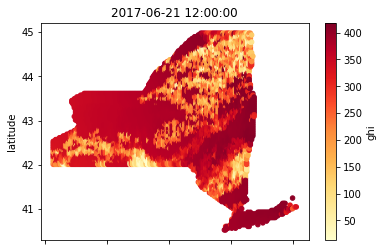

In [88]:
df17.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index_17[timestep_17]))
plt.show()

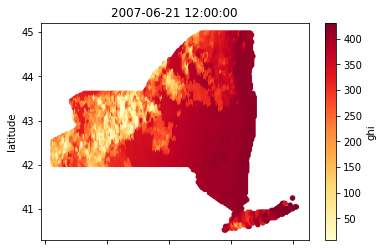

In [99]:
#get full set of NY state in 2007
f_07 = h5pyd.File(yr_2007, 'r', endpoint=END_POINT, api_key=API_TOKEN)
ghi_07 = f_07['ghi']
meta07 = pd.DataFrame(f_07['meta'][...])

NY07 = meta07.loc[meta07['state'] == b'New York'] 

time_index_07 = pd.to_datetime(f_07['time_index'][...].astype(str))
timestep_07 = np.where(time_index_07 == '2007-06-21 12:00:00')[0][0] #summer Solstice

df07 = NY07[['longitude', 'latitude']].copy()
df07['ghi'] = ghi_07[timestep_07][NY07.index]/ ghi_07.attrs['psm_scale_factor']

df07.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index_07[timestep_07]))
plt.show()

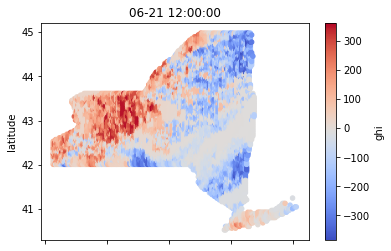

In [97]:
#Here compare the GHI difference between 2007 and 2017 in New York State

time_index_07 = pd.to_datetime(f_07['time_index'][...].astype(str))
timestep_07 = np.where(time_index_07 == '2007-06-21 12:00:00')[0][0] #summer Solstice

df_dif = df17.copy()
df_dif['ghi'] = df17['ghi'] - df07['ghi']


df_dif.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='coolwarm',
                title=str("06-21 12:00:00"))
plt.show()

